<a href="https://colab.research.google.com/github/n1rjal/provathan-backend/blob/master/rheumatoid_arthritis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import tensorflow as tf
import pandas as pd
import numpy as np

from tensorflow import keras
from tensorflow.keras import layers,optimizers
from tensorflow.keras.layers.experimental import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.externals import joblib 
import matplotlib.pyplot as plt
import seaborn as sns

print(tf.__version__)
!python --version

2.5.0
Python 3.7.10


In [32]:
data= pd.read_csv("/content/drive/MyDrive/Data Set/2nd data.csv",index_col=[0])
data.head()

,age,gender,CCP antibodies,RF,C-reactive protein,Heredity Arthritis Disease,Uric Acid,Erythrocyte sedimentation rate,RBC,WBC,Hematocrit,Hemoglobin,Platelets,risk
0,29,F,False,True,1.7,True,4.910280,4.0,5.07,9.1,36,12.108847,284,49.161434
1,59,M,False,False,4.6,True,8.426087,17.0,5.26,9.8,43,15.164800,299,65.161287
2,22,M,False,False,2.0,True,5.372292,33.0,5.13,4.9,41,13.735531,425,44.806760
3,28,M,True,False,0.6,False,4.111470,5.0,5.12,7.6,44,14.188672,207,48.671328
4,31,F,False,True,0.4,True,3.307039,16.0,5.27,8.5,46,13.163278,237,52.296722


In [33]:
data.describe()

,age,C-reactive protein,Uric Acid,Erythrocyte sedimentation rate,RBC,WBC,Hematocrit,Hemoglobin,Platelets,risk
count,50000.000000,50000.000000,50000.000000,49404.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,59.997140,2.495350,5.612496,14.385738,4.808935,7.814992,41.986320,14.567586,299.998000,57.245430
std,23.387514,1.443634,1.451381,10.627157,0.507558,1.903460,4.793703,1.396589,86.994609,17.741422
min,20.000000,0.000000,2.700061,0.000000,3.930000,4.500000,34.000000,11.700030,150.000000,6.414416
25%,40.000000,1.200000,4.483182,6.000000,4.370000,6.200000,38.000000,13.526587,225.000000,44.611240
50%,60.000000,2.500000,5.619983,13.000000,4.810000,7.800000,42.000000,14.594026,300.000000,57.349378
75%,80.000000,3.700000,6.756236,19.000000,5.250000,9.500000,45.000000,15.649918,376.000000,70.116855
max,100.000000,5.000000,8.499899,50.000000,5.690000,11.100000,52.000000,17.299730,450.000000,94.991219


In [34]:
data.isnull().sum()
data.dropna(inplace=True)

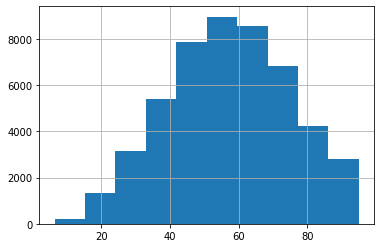

In [35]:
data["risk"].hist()

## Cleaning Data
For Data Labels like M and Female, we are normalizing it as 

 1. M -> 1 ( True )
 2. F -> 0 ( False )

In [36]:
data["gender"] = data["gender"] == "M"

In [37]:
data.head()

,age,gender,CCP antibodies,RF,C-reactive protein,Heredity Arthritis Disease,Uric Acid,Erythrocyte sedimentation rate,RBC,WBC,Hematocrit,Hemoglobin,Platelets,risk
0,29,False,False,True,1.7,True,4.910280,4.0,5.07,9.1,36,12.108847,284,49.161434
1,59,True,False,False,4.6,True,8.426087,17.0,5.26,9.8,43,15.164800,299,65.161287
2,22,True,False,False,2.0,True,5.372292,33.0,5.13,4.9,41,13.735531,425,44.806760
3,28,True,True,False,0.6,False,4.111470,5.0,5.12,7.6,44,14.188672,207,48.671328
4,31,False,False,True,0.4,True,3.307039,16.0,5.27,8.5,46,13.163278,237,52.296722


In [38]:
#lets change data into features and labels

y= data["risk"]
X= data.loc[:, data.columns != 'risk'].astype("float32")
y
X

,age,gender,CCP antibodies,RF,C-reactive protein,Heredity Arthritis Disease,Uric Acid,Erythrocyte sedimentation rate,RBC,WBC,Hematocrit,Hemoglobin,Platelets
0,29.0,0.0,0.0,1.0,1.7,1.0,4.910280,4.0,5.07,9.1,36.0,12.108847,284.0
1,59.0,1.0,0.0,0.0,4.6,1.0,8.426086,17.0,5.26,9.8,43.0,15.164800,299.0
2,22.0,1.0,0.0,0.0,2.0,1.0,5.372292,33.0,5.13,4.9,41.0,13.735531,425.0
3,28.0,1.0,1.0,0.0,0.6,0.0,4.111470,5.0,5.12,7.6,44.0,14.188672,207.0
4,31.0,0.0,0.0,1.0,0.4,1.0,3.307039,16.0,5.27,8.5,46.0,13.163278,237.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,86.0,0.0,1.0,1.0,0.6,1.0,6.681817,5.0,5.51,10.8,42.0,14.174668,425.0
996,77.0,0.0,1.0,0.0,0.0,1.0,6.525177,4.0,4.44,4.6,42.0,11.935639,271.0
997,22.0,1.0,1.0,0.0,1.8,0.0,7.805681,11.0,5.15,11.0,41.0,17.022968,299.0
998,42.0,0.0,1.0,0.0,4.8,1.0,5.759043,3.0,5.19,4.8,37.0,11.977140,342.0


In [39]:
#lets check for shape of X and y
print("Shape of X ",X.shape)
print("Dim of X ",X.ndim)
print("Shape of y ",y.shape)
print("Dim of y ",y.ndim)

Shape of X  (49404, 13)
Dim of X  2
Shape of y  (49404,)
Dim of y  1


In [40]:
### Lets make train test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [41]:
## lets scale our data using robust scalar
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

X_train.shape

(39523, 13)

In [42]:
#lets make keras model
model = keras.Sequential()
model.add(layers.Dense(13,input_shape=(1,13),activation="relu"))
model.add(layers.Dense(128,activation="relu"))
model.add(layers.Dense(128,activation="relu"))
model.add(layers.Dense(128,activation="relu"))
model.add(layers.Dense(128,activation="relu"))
model.add(layers.Dense(1,activation="relu"))

In [43]:
model.compile(optimizer="adam", loss='mean_squared_error')

In [44]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 1, 13)             182       
_________________________________________________________________
dense_13 (Dense)             (None, 1, 128)            1792      
_________________________________________________________________
dense_14 (Dense)             (None, 1, 128)            16512     
_________________________________________________________________
dense_15 (Dense)             (None, 1, 128)            16512     
_________________________________________________________________
dense_16 (Dense)             (None, 1, 128)            16512     
_________________________________________________________________
dense_17 (Dense)             (None, 1, 1)              129       
Total params: 51,639
Trainable params: 51,639
Non-trainable params: 0
__________________________________________________

In [45]:
#train the neural network on the train dataset
history = model.fit(X_train, y_train, epochs=100, validation_split=0.2)

Epoch 1/100
989/989 [==============================] - 3s 3ms/step - loss: 129.4467 - val_loss: 8.0284
Epoch 2/100
989/989 [==============================] - 3s 3ms/step - loss: 6.7730 - val_loss: 9.9491
Epoch 3/100
989/989 [==============================] - 3s 3ms/step - loss: 3.5931 - val_loss: 3.5805
Epoch 4/100
989/989 [==============================] - 3s 3ms/step - loss: 2.6158 - val_loss: 2.0798
Epoch 5/100
989/989 [==============================] - 2s 2ms/step - loss: 2.1574 - val_loss: 4.9565
Epoch 6/100
989/989 [==============================] - 3s 3ms/step - loss: 1.9495 - val_loss: 2.3496
Epoch 7/100
989/989 [==============================] - 3s 3ms/step - loss: 1.7272 - val_loss: 2.6170
Epoch 8/100
989/989 [==============================] - 3s 3ms/step - loss: 1.4589 - val_loss: 2.0267
Epoch 9/100
989/989 [==============================] - 3s 3ms/step - loss: 1.3052 - val_loss: 1.4387
Epoch 10/100
989/989 [==============================] - 3s 3ms/step - loss: 1.0055 - val_

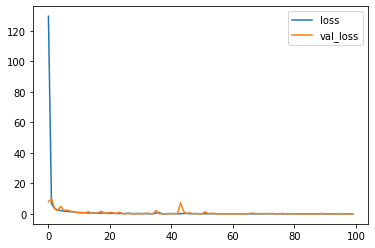

In [46]:
#plot the loss and validation loss of the dataset
history_df = pd.DataFrame(history.history)
plt.plot(history_df['loss'], label='loss')
plt.plot(history_df['val_loss'], label='val_loss')

plt.legend()


In [47]:
model.save("ra.h5")
joblib.dump(scaler,"minmax.pkl")

['minmax.pkl']

Text(0.5, 1.0, 'A plot that shows the true and predicted values')

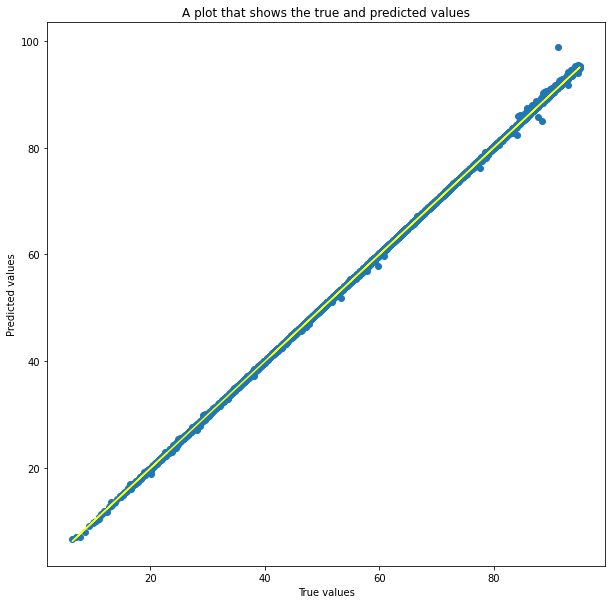

In [48]:
y_pred = model.predict(X_test).flatten()
plt.figure(figsize=(10,10))
plt.scatter(y_test, y_pred, linewidths=1)
plt.plot(y_test,y_test,color="yellow",label="Real Value")
plt.xlabel('True values')
plt.ylabel('Predicted values')
plt.title('A plot that shows the true and predicted values')

In [49]:
data.keys()

Index(['age', 'gender', 'CCP antibodies', 'RF', 'C-reactive protein',
       'Heredity Arthritis Disease', 'Uric Acid',
       'Erythrocyte sedimentation rate', 'RBC', 'WBC', 'Hematocrit',
       'Hemoglobin', 'Platelets', 'risk'],
      dtype='object')

In [58]:
# the model in the server has 300 epoch
class ProvathanModel:
  def __init__(self,model_path,min_max_path):
    self.MinMaxScalar= joblib.load(min_max_path) 
    self.model= keras.models.load_model(model_path)

  def predict(self, row):
    gender = row["gender"]
    age = row["age"] == "M"
    CCP = row["CCP antibodies"]
    RF  = row["RF"]
    CRP = row["C-reactive protein"]
    HAD = row["Heredity Arthritis Disease"]
    UA  = row["Uric Acid"]
    ESR = row["Erythrocyte sedimentation rate"]
    RBC = row["RBC"]
    WBC = row["WBC"]
    HMC = row["Hematocrit"]
    HMG = row["Hemoglobin"]
    PLT = row["Platelets"]

    input = pd.DataFrame({"gender":[gender],
                       "age":[age],
                       "CCP antibodies":[CCP],
                       "RF":[RF],
                       "C-reactive protein":[CRP],
                       "Heredity Arthritis Disease":[HAD],
                       "Uric Acid":[UA],
                       "Erythrocyte sedimentation rate":[ESR],
                       "RBC":[RBC],
                       "WBC":[WBC],
                       "Hematocrit":[HMC],
                       "Hemoglobin":[HMG],
                       "Platelets":[PLT]
                       }).astype("float32")
    
    normalized_input = self.MinMaxScalar.transform(input)
    result = self.model.predict( normalized_input )
    return float(result)

In [59]:
p1 =  ProvathanModel(model_path="/content/ra.h5", min_max_path="/content/minmax.pkl")

In [60]:
p1.predict({'C-reactive protein': 1.7000000000000002,
 'CCP antibodies': False,
 'Erythrocyte sedimentation rate': 4.0,
 'Hematocrit': 36,
 'Hemoglobin': 12.1088465273,
 'Heredity Arthritis Disease': True,
 'Platelets': 284,
 'RBC': 5.07,
 'RF': True,
 'Uric Acid': 4.9102802805,
 'WBC': 9.1,
 'age': 29,
 'gender': False}
 )

46.28342819213867